In [123]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("diabetes.csv")

Logistic regression is used because the outcome of the diabetes data has only two outcomes, 0 if one does not have diabetes, and 1 if one does have diabetes.

In [124]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

selected_features = ["Pregnancies","Glucose","BloodPressure","Insulin","BMI","DiabetesPedigreeFunction","Age","SkinThickness"]

data_x = data[selected_features]
data_y = data[["Outcome"]]
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.2, random_state=0)


model = sm.GLM(data_y, data_x, family=sm.families.Binomial()).fit()
print(model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                Outcome   No. Observations:                  768
Model:                            GLM   Df Residuals:                      760
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -467.33
Date:                Thu, 17 Oct 2024   Deviance:                       934.65
Time:                        12:05:32   Pearson chi2:                     793.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.07374
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies             

The p-value for pregnancies, glucose, and blood pressure are all very low which indicate that they are useful predictors. Age might still be a useful predictor because its p-value is low, but a little too high. The other variables don't seem useful because all their p-values are very high.

In [125]:
# Creating a model using the four variables with low p-values and charting the predictions with the actual values
selected_features = ["Pregnancies", "Glucose", "BloodPressure"]

train_x = train_x[selected_features]
test_x_2 = test_x
test_x = test_x[selected_features]

model = sm.GLM(train_y, train_x, family=sm.families.Binomial()).fit()
predictions = pd.DataFrame(model.predict(test_x))
predictions.columns = ["Outcome"]



# Evaluating Model

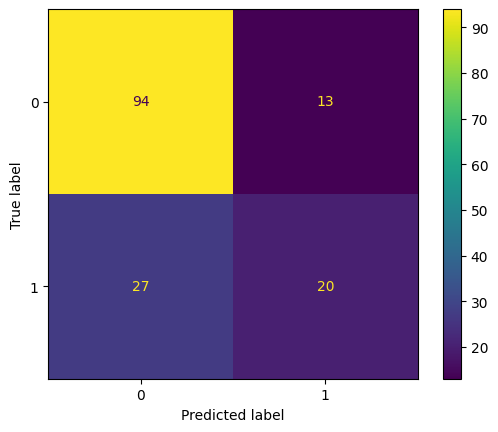

Accuracy: 0.7402597402597403
Precision: 0.6060606060606061
Sensitivity: 0.425531914893617
Specificity: 0.8785046728971962


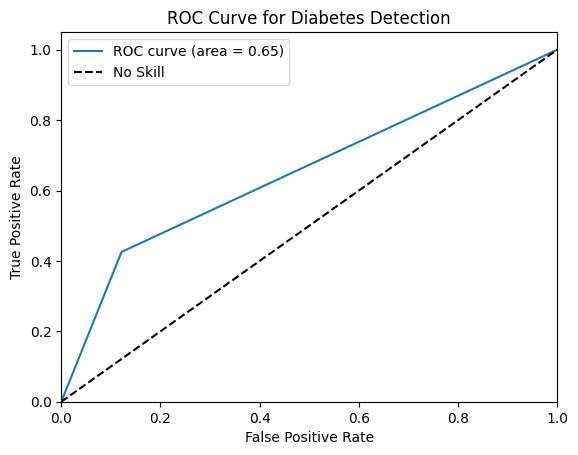

In [126]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Confusion Matrix
clean_predictions = predictions
for i in range(len(clean_predictions)):
    if (clean_predictions.iloc[i, 0] > 0.5):
        clean_predictions.iloc[i, 0] = 1
    else:
        clean_predictions.iloc[i, 0] = 0
cm = confusion_matrix(test_y, clean_predictions)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

cm_display.plot()
plt.show()

print("Accuracy:", accuracy_score(test_y, clean_predictions))
print("Precision:", precision_score(test_y, clean_predictions))
print("Sensitivity:", recall_score(test_y, clean_predictions))
print("Specificity:", recall_score(test_y, clean_predictions, pos_label=0))

# AUC-ROC Curve
fpr, tpr, thresholds = roc_curve(test_y, predictions)
roc_auc = auc(fpr, tpr)

plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Detection')
plt.legend()
plt.show()
